# PCA Loading For Correlations Between Variables
<br>When a question comes up that "are users who do Event A also likely to do Event B?", there are many way to answer it using machine learning. In this notebook, we will demonstrate how to answer it using PCA Loading. 
<br>
PCA Loadings are the correlations between the original variables and the unit-scaled components. Formula as:

$$
  Loading = EigenVector * {\sqrt{EigenValue}}
$$

We will use Iris dataset for the demonstration.

## 1. Import Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# from sklearn import set_config
# set_config(display='text')

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
iris = load_iris()

df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species = lambda x: x['target'].map(dict(enumerate(iris['target_names']))))

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 2. Scale Variables

In [19]:
var = df.columns[0:4]

scaler = StandardScaler()

df[var] = scaler.fit_transform(df[var])

df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,-4.736952e-16,1.003350,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal width (cm),150.0,-7.815970e-16,1.003350,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal length (cm),150.0,-4.263256e-16,1.003350,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal width (cm),150.0,-4.736952e-16,1.003350,-1.447076,-1.183812,0.132510,0.790671,1.712096
target,150.0,1.000000e+00,0.819232,0.000000,0.000000,1.000000,2.000000,2.000000


## 3. PCA

In [20]:
pca = PCA().fit(df[var])

print(pca.explained_variance_ratio_.cumsum())

[0.72962445 0.95813207 0.99482129 1.        ]


Text(0.5, 1.0, 'Scree Plot')

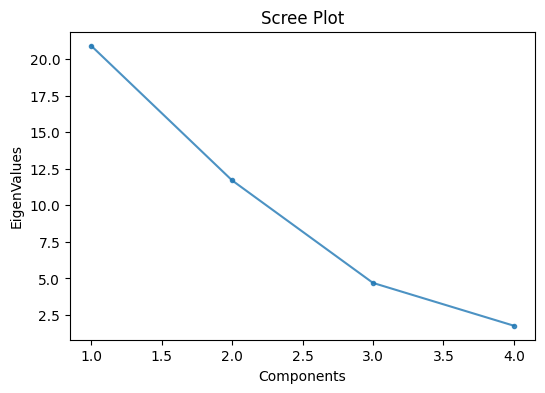

In [73]:
# scree plot
fig = plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.singular_values_)+1), pca.singular_values_, alpha=0.8, marker='.')
y_label = plt.ylabel('EigenValues')
x_label = plt.xlabel('Components')
plt.title('Scree Plot')

## 4. Visualize Loading

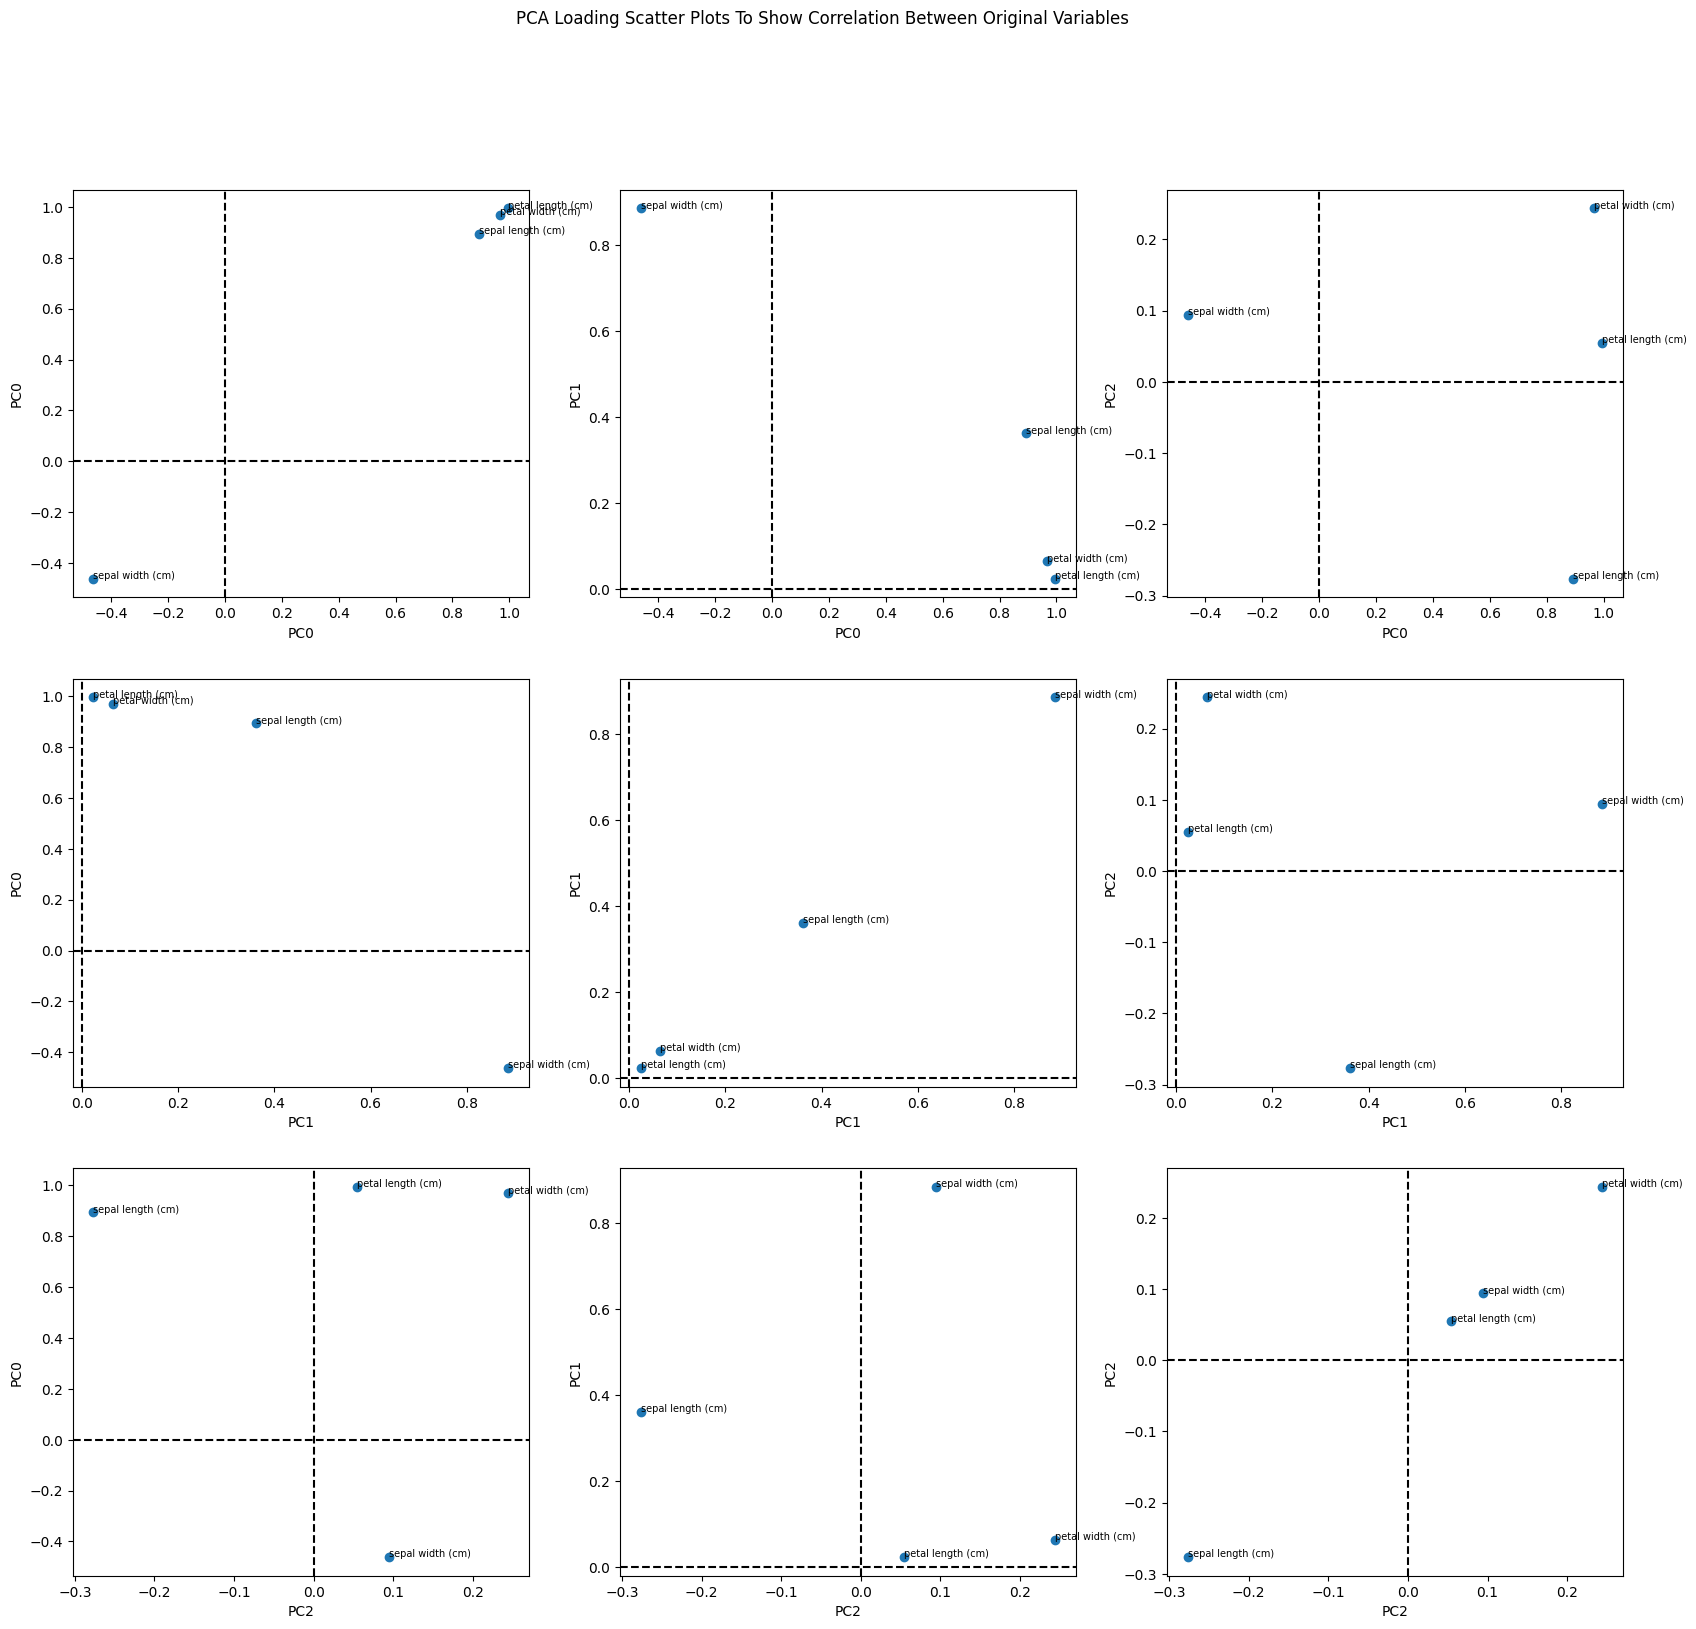

In [78]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

nrows=3
ncols=3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,6*nrows))
for nrow in range(nrows):
    for ncol in range(ncols):
        axs[nrow,ncol].scatter(loadings[:,nrow], loadings[:,ncol])
        for i, col in enumerate(var):
            axs[nrow,ncol].annotate(col, (loadings[i,nrow], loadings[i,ncol]), xytext=(0,0), textcoords='offset points', fontsize=7)
        axs[nrow,ncol].axhline(y=0, color='black', linestyle='--')
        axs[nrow,ncol].axvline(x=0, color='black', linestyle='--')
        axs[nrow,ncol].set_xlabel('PC'+str(nrow))
        axs[nrow,ncol].set_ylabel('PC'+str(ncol))
fig.suptitle('PCA Loading Scatter Plots To Show Correlation Between Original Variables')
plt.show()